### Лайко Рудольф
#### Лабораторная работа 1. Вариант 12
##### Задание 1.1.12
* Исходный ряд:
$$144\sum_{n=0}^{\infty}\dfrac{1}{5(n^2 + 6n + 8)} $$



* Аналитически вычислим частичные суммы $S_N = 144\sum_{n=0}^{N}\dfrac{1}{5(n^2 + 6n + 8)}$ при $N = 10, 10^2, 10^3, 10^4, 10^5$:


$$144\sum_{n=0}^{N}\dfrac{1}{5(n^2 + 6n + 8)} = \dfrac{144}{5}\sum_{n=0}^{N}\dfrac{1}{(n+4)(n+2)} = \dfrac{144}{10}\sum_{n=0}^{N}\left(\dfrac{1}{n+2} - \dfrac{1}{n+4}\right) = \dfrac{144}{10}\left(\dfrac{1}{2} + \dfrac{1}{3} -\dfrac{1}{N+1} - \dfrac{1}{N+2}\right)$$

$$S= lim_{N\rightarrow+\infty} S_N = 12$$


* С помощью функции *sum_series(series, correct)* выведем частичные суммы ряда при разных N и посмотрим на величину абсолютной ошибки $|S(N) - S|$ 
* Сам ряд объявлен с помощью анонимной(lambda) функции *my_series*
* Согласно определению верной цифры, функция *get_digit* определеяет ее по величине абсолютной погрешности _error_ - единственного аргумента
* Представим результаты в виде таблицы и отобразим на гистограмме

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import math 
import itertools

plt.style.use("ggplot")
%matplotlib inline

In [21]:
my_series = lambda x: 144/(5*(x**2 + 6*x + 8))

def sum_series(series, N_s, correct):
    
    sums = []
    errors = []
    true_digits = []
    
    for i in N_s:
        sum_N =  np.sum([series(n) for n in range(i)])
        sums.append(sum_N)
        
        error_N = abs(correct - sum_N)
        errors.append(error_N)
        
        true_digits.append(get_digit(error_N))
        
        """
        print("Частичная сумма ряда при N={}: {}".format(i, sum_N))
        print("Aбсолютная погрешность: {}\n".format(error_N))
        """
        
    return sums, errors, true_digits
    
        
def get_digit(error):
    
    """
    Значащую цифру числа называют верной, если абсолютная погрешность числа не превосходит единицы
    разряда, соответствующего этой цифре. 
    """
    true_dig = 0
    degree = 1.0
    while (degree > -10):
        """
        Проверим единицу разряда
        """
        if (error < np.power(10, degree)):
            true_dig += 1
            degree -= 1
        else:
             return true_dig
            
    return None

In [22]:
N = [10, 10**2, 10**3, 10**4, 10**5]
correct_sum = 12

part_sums, abs_erorrs, true_digits = sum_series(my_series, N, correct_sum)

results = pd.DataFrame()
results["N"] = N
results["Partial summations"] = part_sums
results["Absolut errors"] = abs_erorrs
results["True digits"] = true_digits
results

,N,Partial summations,Absolut errors,True digits
0,10,9.692308,2.307692,1
1,100,11.719018,0.280982,2
2,1000,11.971272,0.028728,3
3,10000,11.997121,0.002879,4
4,100000,11.999712,0.000288,5


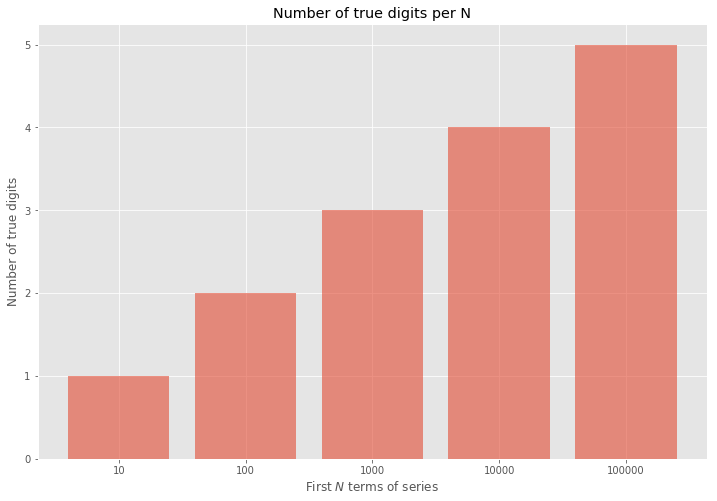

In [47]:
plt.figure(figsize=(12, 8))
plt.title("Number of true digits per N")

plt.xlabel("First $N$ terms of series")
plt.ylabel("Number of true digits")
plt.bar(range(len(true_digits)), true_digits, alpha = 0.6)
xx = plt.xticks(range(len(N)), list(map(str, N)))

### Вывод
----
* как видно из таблицы и графика выше, при увеличении числа членов ряда в 10 раз, количество верных цифр *увеличивается* на одну

---

#### Задание 1.8

Составить программу, моделирующую вычисления на ЭВМ с ограниченной разрядностью $m$.
Решить задачу 1.1 для случая $N =10000$ , используя эту программу. Составить график зависимости
погрешности от количества разрядов $m=4,5,…,8$.

* Исходный ряд:
$$144\sum_{n=0}^{\infty}\dfrac{1}{5(n^2 + 6n + 8)} $$

* будем "эмулировать" вычисленитя на такой ЭВМ с помощью функции *num_sum()*, в которой будем просто обрезать вычисленной число согласно разряду
* на каждой итерации будем считать элемент частичной суммы согласно формуле, затем представим результат как произведение мантиссы и степени двойки, обрежем мантиссу на необходимое количество(разряд)

In [66]:
def get_relative_err(exact_sum, not_exact):
    return abs((not_exact - exact_sum) / exact_sum)

def get_abs_err(exact_sum, not_exact):
    return abs(exact_sum - not_exact)

def num_sum(n, digit):
    cur_sum = 0
    for i in range(0,n+1):
        cur_elem = my_series(i)
        mantissa, exp = math.frexp(cur_elem)
        digits = str(mantissa)[:digit+2]
        cur_elem = float(digits)*2**exp
        cur_sum += cur_elem
    return cur_sum

In [68]:
N = 10000
sum_1e5 =  np.sum([my_series(n) for n in range(N)])

digit = range(4, 9)
absolute_err = []
relative_err = []
values = []
results = pd.DataFrame()

for i in digit:
    cur_sum = mysum(N, i)
    cur_rel_err = get_relative_err(sum_1e5, cur_sum)
    cur_abs_err = get_abs_err(sum_1e5, cur_sum)
    
    absolute_err.append(cur_abs_err)
    relative_err.append(cur_rel_err)
    values.append(cur_sum)
    
results["Digit (m)"] = digit
results["Partial sum with m digits"] = values
results["Absolute errors"] = absolute_err
results["Relative errors"] = relative_err

In [69]:
results

,Digit (m),Partial sum with m digits,Absolute errors,Relative errors
0,4,11.996835,2.859106e-04,2.383160e-05
1,5,11.997089,3.149983e-05,2.625616e-06
2,6,11.997119,1.803089e-06,1.502934e-07
3,7,11.997121,5.218987e-08,4.350200e-09
4,8,11.997121,2.659397e-07,2.216696e-08


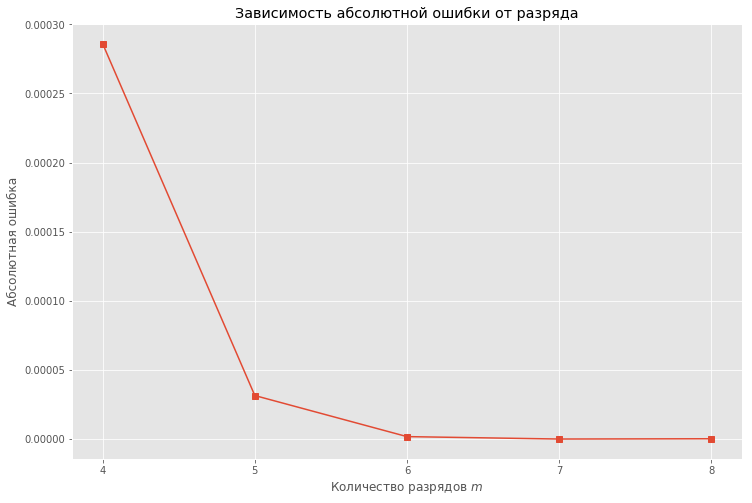

In [87]:
plt.figure(figsize=(12, 8))
plt.title("Зависимость абсолютной ошибки от разряда")
plt.plot(digit, absolute_err, '-s')
plt.xticks(digit)
plt.xlabel("Количество разрядов $m$")
plt.ylabel("Абсолютная ошибка")

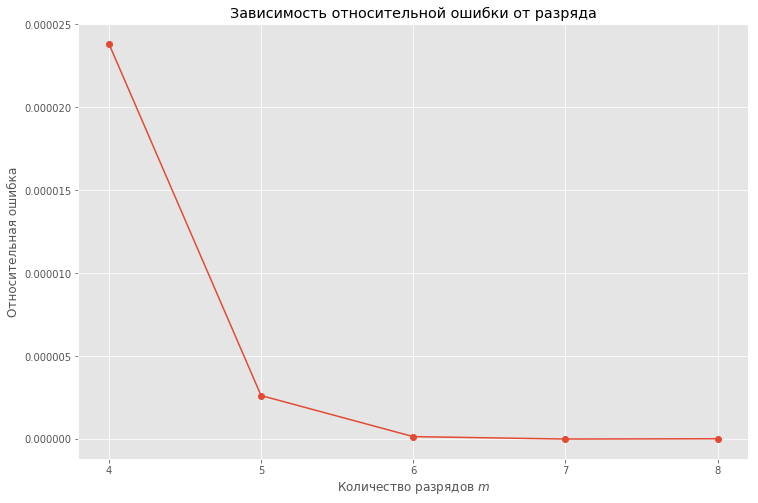

In [90]:
plt.figure(figsize=(12, 8))
plt.title("Зависимость относительной ошибки от разряда")
plt.plot(digit, relative_err, '-o')
plt.xticks(digit)
plt.xlabel("Количество разрядов $m$")
plt.ylabel("Относительная ошибка")

### Задание 1.5.3

* Дано квадратное уравнение $x^2 + bx + c = 0$. Предполагается, что один из коэффициентов уравнения (в индивидуальном варианте помечен) получен в результате округления. Произвести теоретическуюоценку погрешностей корней в зависимости от погрешности коэффициента. Вычислить корни уравнения принескольких различных значениях коэффициента в пределах заданной точности. Сравнить полученные результаты.

$b^* = 37.4, c = 187.65$

$ x_1 = \dfrac{-b + \sqrt{D}}{2} $ , 
$ x_2 = \dfrac{-b - \sqrt{D}}{2} $

где $D = b^2 - 4ac$

Согласно теореме Виетта, корни уравнения связаны следующим образом : $x_1 + x_2 = -b; x_1*x_2 = c$
То есть можем найти корни: $D \approx b^{*2} - 4c \approx  25,46^2$

$x_2^* = -\dfrac{37.40 + 25.46}{2} = -31.43$


$x_1^* = \dfrac{c}{x_2} = -5.97$

Для оценки погрешностей, воспользуемся формулой : 

$\sigma(y^*) = \sum_{j=1}^{m}\mu_j^{*}\sigma(x_j^*)$

$\mu_j^* = \dfrac{|x_j^*||r'_{x_j}(x^*)|}{|r_{x_j}(x^*)|}$
где $r_{x_1}(b, c) = \dfrac{-b + \sqrt{b^2 - 4ac}}{2}$;
$r_{x_2}(b, c) = \dfrac{-b - \sqrt{b^2 - 4ac}}{2}$

$\sigma(x_1^{*}) = \mu_1^*\sigma(b^*),$  $\mu_1^* = \dfrac{|b^*||r'_{x1}(b, c)|}{|x_1^*|}$

$\sigma(x_2^{*}) = \mu_2^*\sigma(b^*),$  $\mu_2^* = \dfrac{|b^*||r'_{x2}(b, c)|}{|x_2^*|}$


$r'_{x_1}(b, c) = \dfrac{-1 + \dfrac{b}{\sqrt{D}}}{2} = 0.2345$


$r'_{x_2}(b, c) = -\dfrac{1 + \dfrac{b}{\sqrt{D}}}{2} = \dfrac{x_2^*}{\sqrt{D}} = -1.2345$




$\mu_1^* = 1.34$ , $\mu_2^* = 1.46$

$\sigma_{x_1^*} = \sigma(b^*) * 1.34 = $;
$\sigma_{x_2^*} = \sigma(b^*) * 1.46$


* Ответ: 

$x_1 = -5.97(1\pm0.1\%)$


$x_2 = -31.43(1\pm0.1\%)$


### Задание 1.7

* Вычислить значения машинного нуля, машинной бесконечности, машинного эпсилон в режимах одинарной и двойной точности на алгоритмическом языке.

In [164]:
def epsilon(precision):
    n = 0
    while(precision(2**(-n) + 1) != 1.0):
        n += 1
    return 2**(-n + 1)



def zero(precision):
    n = 0
    while(precision(2**(-n)) != 0.0):
        n += 1
    return 2**(-n + 1)


def infty(precision):
    n = 0
    my_inf = 0
    while my_inf != np.inf:
        try:
            my_inf = precision(2.0 ** n)
        except OverflowError:
            return 2.0**(n-1)
        n += 1
    return 2.0**(n-1)

* Одинарная точность - *numpy.float32*

In [166]:
print("Машинный эпсилон: {}".format(epsilon(np.float32)))
print("Машинный ноль: {}".format(zero(np.float32)))
print("Машинная бесконечность: {}".format(infty(np.float32)))

Машинный эпсилон: 1.1920928955078125e-07
Машинный ноль: 1.401298464324817e-45
Машинная бесконечность: 3.402823669209385e+38


* Двойная точность - *numpy.float64*

In [167]:
print("Машинный эпсилон: {}".format(epsilon(np.float64)))
print("Машинный ноль: {}".format(zero(np.float64)))
print("Машинная бесконечность: {}".format(infty(np.float64)))

Машинный эпсилон: 2.220446049250313e-16
Машинный ноль: 5e-324
Машинная бесконечность: 8.98846567431158e+307


### Задание 1.10

Три вектора $a_1, a_2, a_3$ заданы своими координатами в базисе $i , j , k$ . Что можно сказать о компланарности этих векторов, если:
* координаты векторов заданы точно;
* координаты векторов заданы приближённо с относительной погрешностью а) $\sigma = \alpha$ % б) $\sigma = \beta$ %. 

$a_1 = (10, 15, 1), a_2 = (0.7, 5.7, -9),  a_3 = (11, 16, 2)$


$\alpha = 0.05, \beta=0.1$

Решим задачу, согласно указаниям в приложении.
* для первого случая, когда координаты указаны точно, проверим равенство определителя матрицы $A$ нулю

In [127]:
def is_complanar(determinant):
    print("Определитель матрицы А: {}".format(determinant))
    if determinant == 0:
        print("Вектора a1, a2, a3 компланарны")
    else:
        print("Вектора a1, a2, a3 некомпланарны")

In [128]:
A = np.array([[10, 15, 1], 
              [0.7, 5.7, -9], 
              [11, 16, 2]])

alpha = 0.05
betta = 0.1

determ = np.linalg.det(A)

is_complanar(determ)

Определитель матрицы А: -3.499999999999865
Вектора a1, a2, a3 некомпланарны


* для второго случая используем функцию *get_dets*, в которой найдем детерминанты $2^9$ матриц, каждая из которых будет сформирована из векторов, координаты которых будут $a_{ij} *(1\pm\sigma)$
* для этого используем матрицу векторов со всеми возможными позициями для погрешности *bool_matrix*, в которой вектора из 0 и 1 будут размерности 9, где 0 в $ij$-ой позиции будет обозначать $a_{ij}-\sigma$, а 1 - $a_{ij}+\sigma$

In [122]:
def get_dets(A, sigma):
    
    determinants = []
    dimension = A.shape[0]*A.shape[1]
    bool_matrix = itertools.product([0,1], repeat=dimension)
    
    for cur_vec in bool_matrix:
        cur_A = A.flatten()
        for i in range(dimension):
            if cur_vec[i] == 0:
                cur_A[i] = cur_A[i] * (1 - sigma)
            else:
                cur_A[i] = cur_A[i] * (1 + sigma)
                
        cur_A = cur_A.reshape((A.shape[0], A.shape[1]))
        
        determinants.append(np.linalg.det(cur_A))
        
    return determinants

##### a) $\sigma = \alpha$ %

In [133]:
def if_complanar(min_det, max_det):
    if min_det*max_det < 0:
        print("Неопределенность, могут быть компланарны")
    else:
        print("Точно не компланарны, нету нуля в отрезке [m, M]")

In [134]:
dets_alpha = get_dets(A, alpha)

min_det, max_det = np.min(dets_alpha), np.max(dets_alpha)

is_complanar(min_det)
is_complanar(max_det)

if_complanar(min_det, max_det)

Определитель матрицы А: -332.6870625000003
Вектора a1, a2, a3 некомпланарны
Определитель матрицы А: 323.0233125000004
Вектора a1, a2, a3 некомпланарны
Неопределенность, могут быть компланарны


##### б) $\sigma = \beta$ %

In [136]:
dets_beta = get_dets(A, betta)

min_det, max_det = np.min(dets_beta), np.max(dets_beta)

is_complanar(min_det)
is_complanar(max_det)

if_complanar(min_det, max_det)

Определитель матрицы А: -689.3415000000006
Вектора a1, a2, a3 некомпланарны
Определитель матрицы А: 680.6415000000002
Вектора a1, a2, a3 некомпланарны
Неопределенность, могут быть компланарны
